In [2]:
#Kishan Kaushik Koritala
#20BCE2331








import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
####### LOADING DATASET

In [3]:
dataset=pd.read_csv("titanic.csv")

In [4]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
###### SPLITTING TO TRAIN AND TEST

In [6]:
from sklearn.model_selection import train_test_split

traindf, testdf = train_test_split(dataset, test_size=0.2, random_state=25)

print(f"No. of training examples: {traindf.shape[0]}")
print(f"No. of testing examples: {testdf.shape[0]}")

No. of training examples: 712
No. of testing examples: 179


In [10]:
test = testdf[:] 
print('test set shape :{} '.format(test.shape))
print('train set shape :{} '.format(traindf.shape))
print('train set info :{} '.format(traindf.info()))
traindf.head()

test set shape :(179, 15) 
train set shape :(712, 15) 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 410 to 132
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     712 non-null    int64  
 1   pclass       712 non-null    int64  
 2   sex          712 non-null    object 
 3   age          572 non-null    float64
 4   sibsp        712 non-null    int64  
 5   parch        712 non-null    int64  
 6   fare         712 non-null    float64
 7   embarked     711 non-null    object 
 8   class        712 non-null    object 
 9   who          712 non-null    object 
 10  adult_male   712 non-null    bool   
 11  deck         157 non-null    object 
 12  embark_town  711 non-null    object 
 13  alive        712 non-null    object 
 14  alone        712 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 79.3+ KB
train set info :None 


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
410,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
638,0,3,female,41.0,0,5,39.6875,S,Third,woman,False,NaN,Southampton,no,False
395,0,3,male,22.0,0,0,7.7958,S,Third,man,True,NaN,Southampton,no,True
221,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
800,0,2,male,34.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True


In [11]:
traindf.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,572.000000,712.000000,712.000000,712.000000
mean,0.386236,2.334270,29.246066,0.540730,0.400281,30.842128
std,0.487228,0.825443,14.503472,1.134313,0.830942,47.270804
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.254150
75%,1.000000,3.000000,37.000000,1.000000,0.000000,30.070800
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#####  Handeling Missing Values

In [12]:
missing_per = round(traindf.isnull().sum()/len(traindf)*100,2)
missing_per[missing_per != 0]

age            19.66
embarked        0.14
deck           77.95
embark_town     0.14
dtype: float64

In [ ]:
### 20% of the data has no Age for the passangers and 77% of data with missing deck information

In [13]:
missing_count=traindf.isnull().sum()
missing_count[missing_count >0.0]

age            140
embarked         1
deck           555
embark_town      1
dtype: int64

In [17]:
# Handling the missing Embarked port
traindf[traindf.embarked.isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [18]:
traindf['embarked'].fillna('S',inplace=True)
traindf['embarked'].value_counts()

S    519
C    133
Q     60
Name: embarked, dtype: int64

In [ ]:
### Handling the missing Age

In [21]:
traindf[traindf.age.isnull()].survived.value_counts()

0    97
1    43
Name: survived, dtype: int64

In [24]:
# Average age of passangers
print('Average Age of passangers : {}'.format(traindf.age.mean()))
# Mean age of passangers who survived vs the one who did not survived
traindf.groupby('survived').age.mean()

Average Age of passangers : 29.246066433566433


survived
0    30.467647
1    27.455819
Name: age, dtype: float64

In [28]:
df5=dataset.fillna(method = 'bfill')
df5

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,E,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,B,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,26.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [31]:
traindf[traindf.age.isnull()].survived.value_counts()

0    97
1    43
Name: survived, dtype: int64

In [32]:
df6=dataset.fillna({'age' : '30'})
df6

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,30,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [33]:
traindf[traindf.age.isnull()].survived.value_counts()

0    97
1    43
Name: survived, dtype: int64

In [36]:
df6=testdf.fillna({'age' : '30'})
df6

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
760,0,3,male,30,0,0,14.5000,S,Third,man,True,NaN,Southampton,no,True
773,0,3,male,30,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
266,0,3,male,16.0,4,1,39.6875,S,Third,man,True,NaN,Southampton,no,False
507,1,1,male,30,0,0,26.5500,S,First,man,True,NaN,Southampton,yes,True
524,0,3,male,30,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0,2,male,30.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
262,0,1,male,52.0,1,1,79.6500,S,First,man,True,E,Southampton,no,False
393,1,1,female,23.0,1,0,113.2750,C,First,woman,False,D,Cherbourg,yes,False
462,0,1,male,47.0,0,0,38.5000,S,First,man,True,E,Southampton,no,True


In [47]:
df6=dataset.fillna(value=dataset["age"].mean())

In [58]:
df9=traindf.dropna()
df9

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
307,1,1,female,17.0,1,0,108.9000,C,First,woman,False,C,Cherbourg,yes,False
540,1,1,female,36.0,0,2,71.0000,S,First,woman,False,B,Southampton,yes,False
710,1,1,female,24.0,0,0,49.5042,C,First,woman,False,C,Cherbourg,yes,True
645,1,1,male,48.0,1,0,76.7292,C,First,man,True,D,Cherbourg,yes,False
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1,1,male,51.0,0,0,26.5500,S,First,man,True,E,Southampton,yes,True
136,1,1,female,19.0,0,2,26.2833,S,First,woman,False,D,Southampton,yes,False
765,1,1,female,51.0,1,0,77.9583,S,First,woman,False,D,Southampton,yes,False
151,1,1,female,22.0,1,0,66.6000,S,First,woman,False,C,Southampton,yes,False


In [ ]:
### CHECKING FOR OUTLIERS

In [62]:
# Checking for outliers in the continuous variables
num_train = traindf[['age','fare']]
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_train.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,age,fare
count,572.000000,712.000000
mean,29.246066,30.842128
std,14.503472,47.270804
min,0.420000,0.000000
25%,20.000000,7.895800
50%,28.000000,14.254150
75%,37.000000,30.070800
90%,49.000000,76.012530
95%,55.450000,107.538750
99%,67.160000,247.520800


In [ ]:
### There are outliers in fare

In [63]:
q = traindf["fare"].quantile(0.99)
traindf = traindf[traindf['fare'] < q]

In [64]:
traindf['fare'].describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    703.000000
mean      27.205576
std       32.744756
min        0.000000
25%        7.895800
50%       13.791700
75%       29.700000
90%       69.550000
95%       89.104200
99%      153.462500
max      227.525000
Name: fare, dtype: float64

In [ ]:
##### UNIVARIATE ANALYSIS

In [ ]:
Survuved:

In [65]:
print(traindf.survived.value_counts())
### Checking the Survival Rate
survival_rate = round((sum(traindf[traindf['survived']==1]['survived'])/len(traindf['survived'].index))*100,2)
print('Survival Rate : {}'.format(survival_rate))

0    434
1    269
Name: survived, dtype: int64
Survival Rate : 38.26


In [ ]:
Survuval rate is 38%

In [ ]:
class:

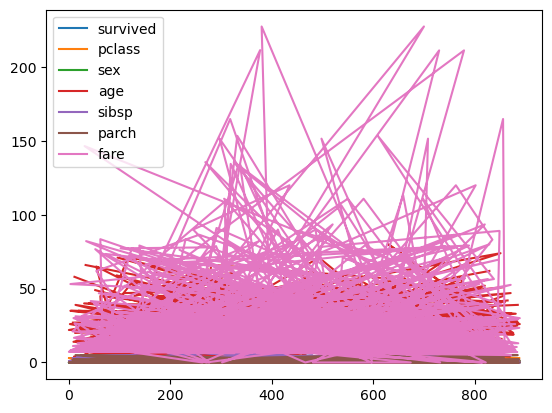

In [128]:
traindf.plot()
plt.show()

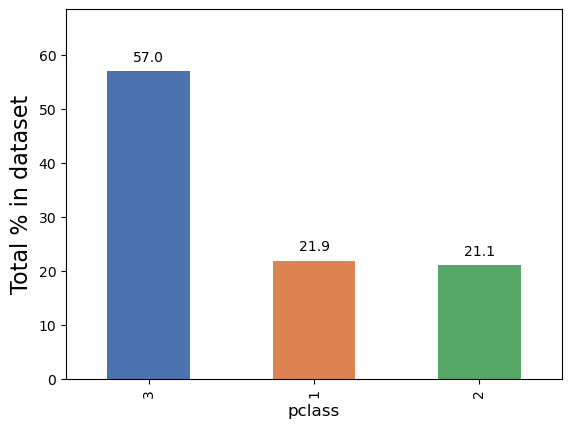

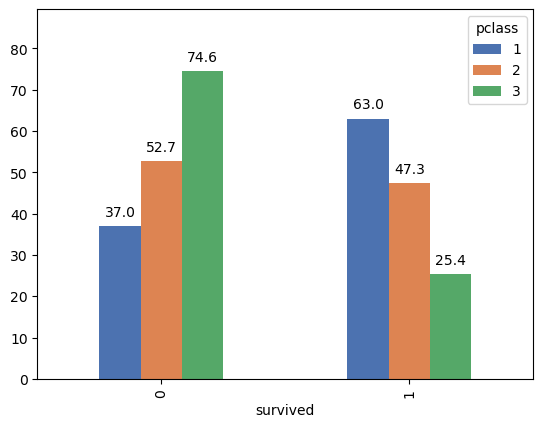

In [141]:
plot_percentages(traindf,'pclass')
plt.show()

In [139]:
def plot_percentages(dataframe, by, sortbyindex=False):
    #plt.subplot(1, 2, 1)
    values = (dataframe[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('deep',16))
    ax.set_ylabel('Total % in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    #plt.subplot(1, 2, 2)
    grp = dataframe.groupby(['survived',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.plot.bar(color=sns.color_palette('deep', 16))
    #ax.set_ylabel('% survived', fontsize=16)
    showLabels(ax)

In [ ]:
Name:

In [73]:
print('Number of unique Passangers: {} '.format(len(traindf.who.unique())))
traindf.who.head()

Number of unique Passangers: 3 


410      man
638    woman
395      man
221      man
800      man
Name: who, dtype: object

In [ ]:
Sex:

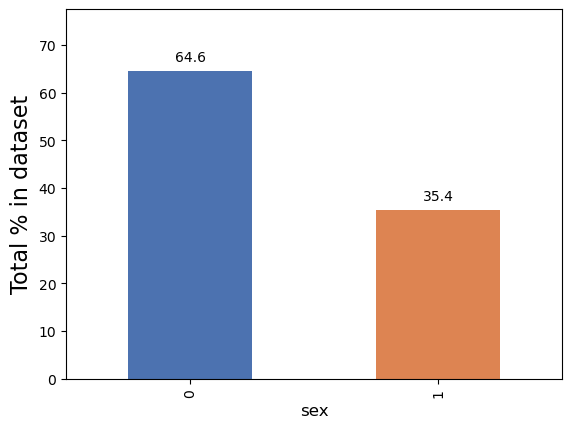

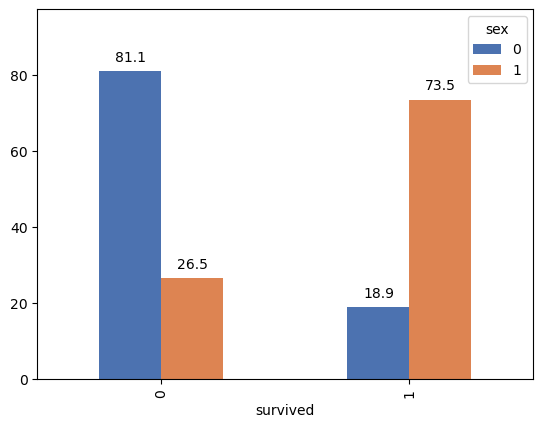

In [140]:
plot_percentages(traindf,'sex')

In [ ]:
Age:

C:\Users\User\AppData\Local\Temp\ipykernel_16860\221741953.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf.age)


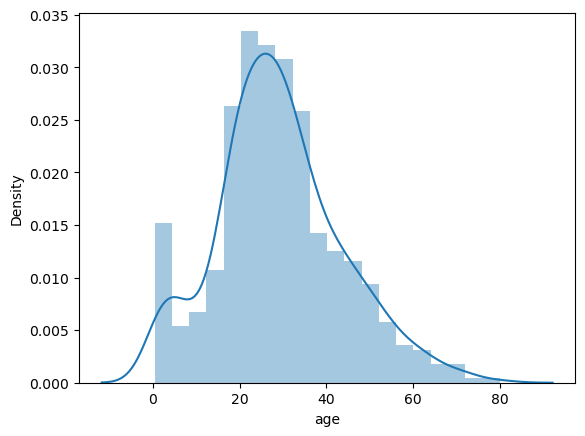

Mean Age : 29.187833037300177


In [80]:
sns.distplot(traindf.age)
plt.show()
print('Mean Age : {}'.format(traindf.age.mean()))

In [82]:
traindf.groupby('survived').age.mean()

survived
0    30.421365
1    27.348451
Name: age, dtype: float64

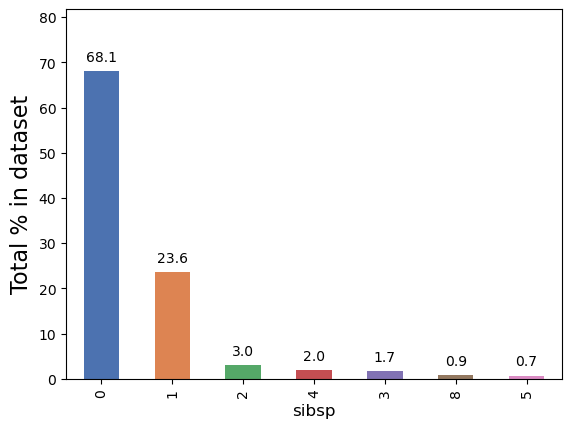

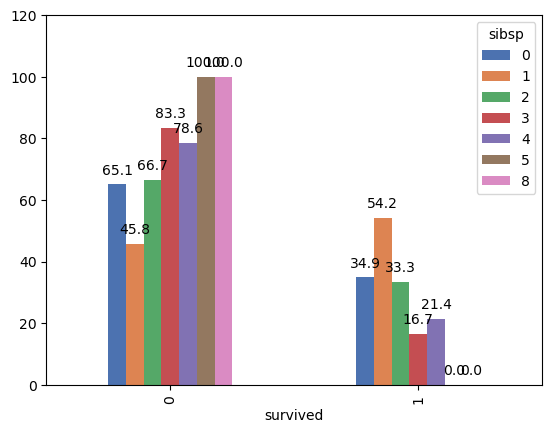

In [142]:
plot_percentages(traindf,'sibsp')

In [ ]:
Parch:

In [84]:
traindf.loc[(traindf['parch'] == 0)  & (traindf['sibsp'] == 0)]['survived'].value_counts(normalize=True)

0    0.688679
1    0.311321
Name: survived, dtype: float64

In [ ]:
Fare:

C:\Users\User\AppData\Local\Temp\ipykernel_16860\3005399074.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traindf.fare)


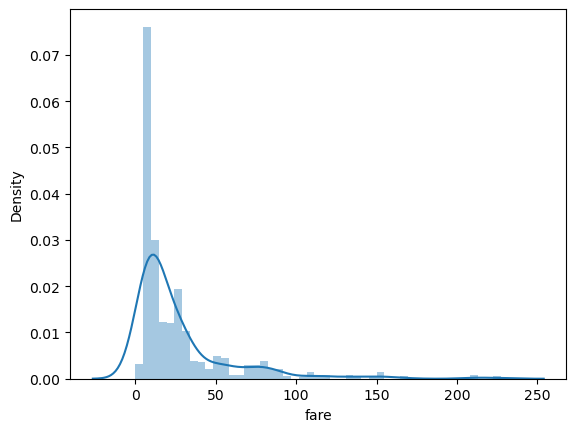

count    703.000000
mean      27.205576
std       32.744756
min        0.000000
25%        7.895800
50%       13.791700
75%       29.700000
max      227.525000
Name: fare, dtype: float64

In [85]:
sns.distplot(traindf.fare)
plt.show()
traindf.fare.describe()

In [ ]:
Embarked:

In [89]:
traindf.embarked.value_counts()

S    515
C    128
Q     60
Name: embarked, dtype: int64

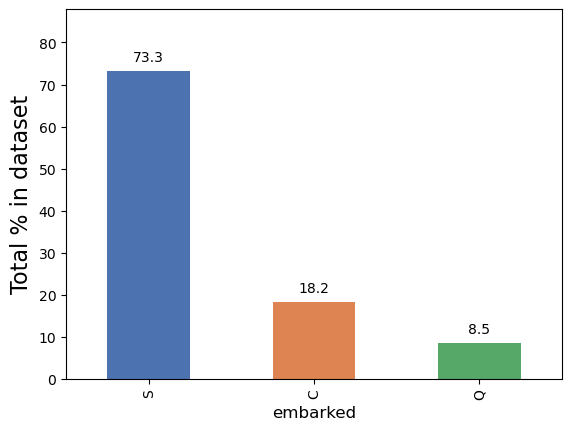

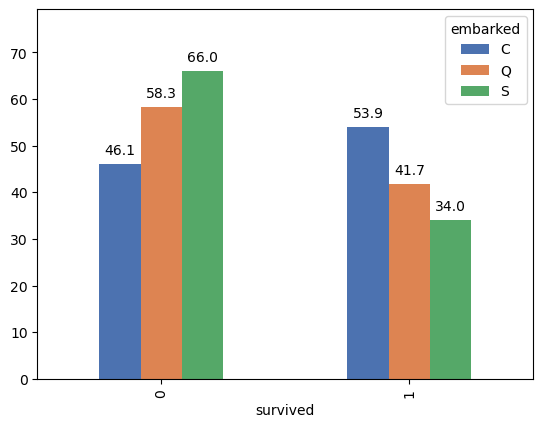

In [143]:
plot_percentages(traindf,'embarked')

In [ ]:
### BIVARIATE ANALYSIS

In [ ]:
pclass and sex:
    

In [91]:
traindf.groupby(['pclass','sex']).survived.value_counts(normalize=False)

pclass  sex     survived
1       female  1            67
                0             3
        male    0            54
                1            30
2       female  1            57
                0             4
        male    0            74
                1            13
3       female  0            59
                1            59
        male    0           240
                1            43
Name: survived, dtype: int64

In [ ]:
Age and sex:

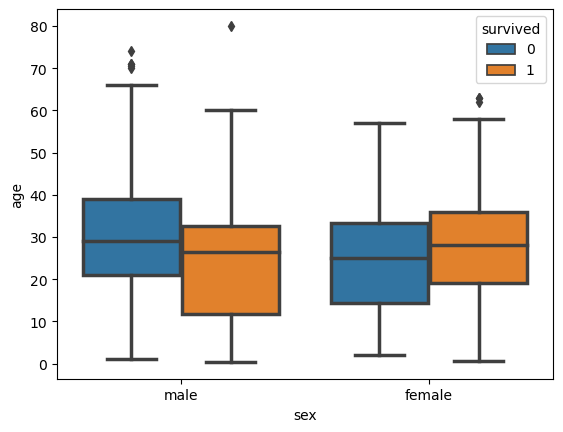

In [92]:
ax = sns.boxplot(x="sex", y="age", hue="survived",data=traindf, linewidth=2.5)


In [ ]:
#### MULTIVARIATE ANALYSIS

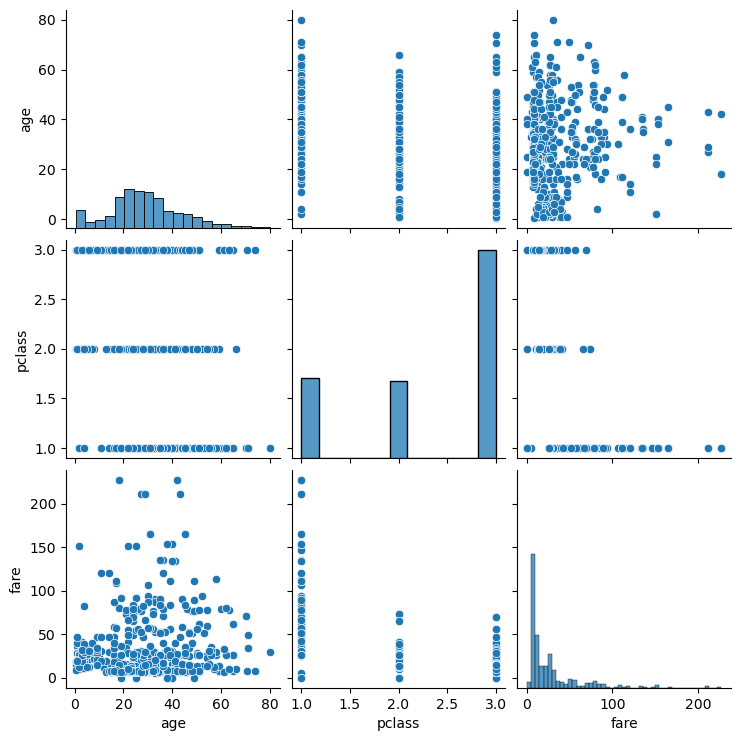

In [98]:
ma = sns.pairplot(data=traindf[['age','sex','pclass','fare']])

In [ ]:
Handling categorical values:

In [100]:
sexdic={'male': 0 , 'female': 1}
traindf['sex'] = traindf['sex'].map(sexdic)

In [101]:
traindf.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
Scaling:

In [102]:
X_train = traindf.drop('survived',axis=1)
y_train = traindf['survived']

In [103]:
scaler = StandardScaler()
X_train[['age','fare']] = scaler.fit_transform(X_train[['age','fare']])
X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
410,3,0,NaN,0,0,-0.590126,S,Third,man,True,NaN,Southampton,no,True
638,3,1,0.815483,0,5,0.381460,S,Third,woman,False,NaN,Southampton,no,False
395,3,0,-0.496230,0,0,-0.593182,S,Third,man,True,NaN,Southampton,no,True
221,2,0,-0.151043,0,0,-0.434136,S,Second,man,True,NaN,Southampton,no,True
800,2,0,0.332220,0,0,-0.434136,S,Second,man,True,NaN,Southampton,no,True


In [ ]:
Correlations:

C:\Users\User\AppData\Local\Temp\ipykernel_16860\3969377629.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(traindf.corr(),annot = True)


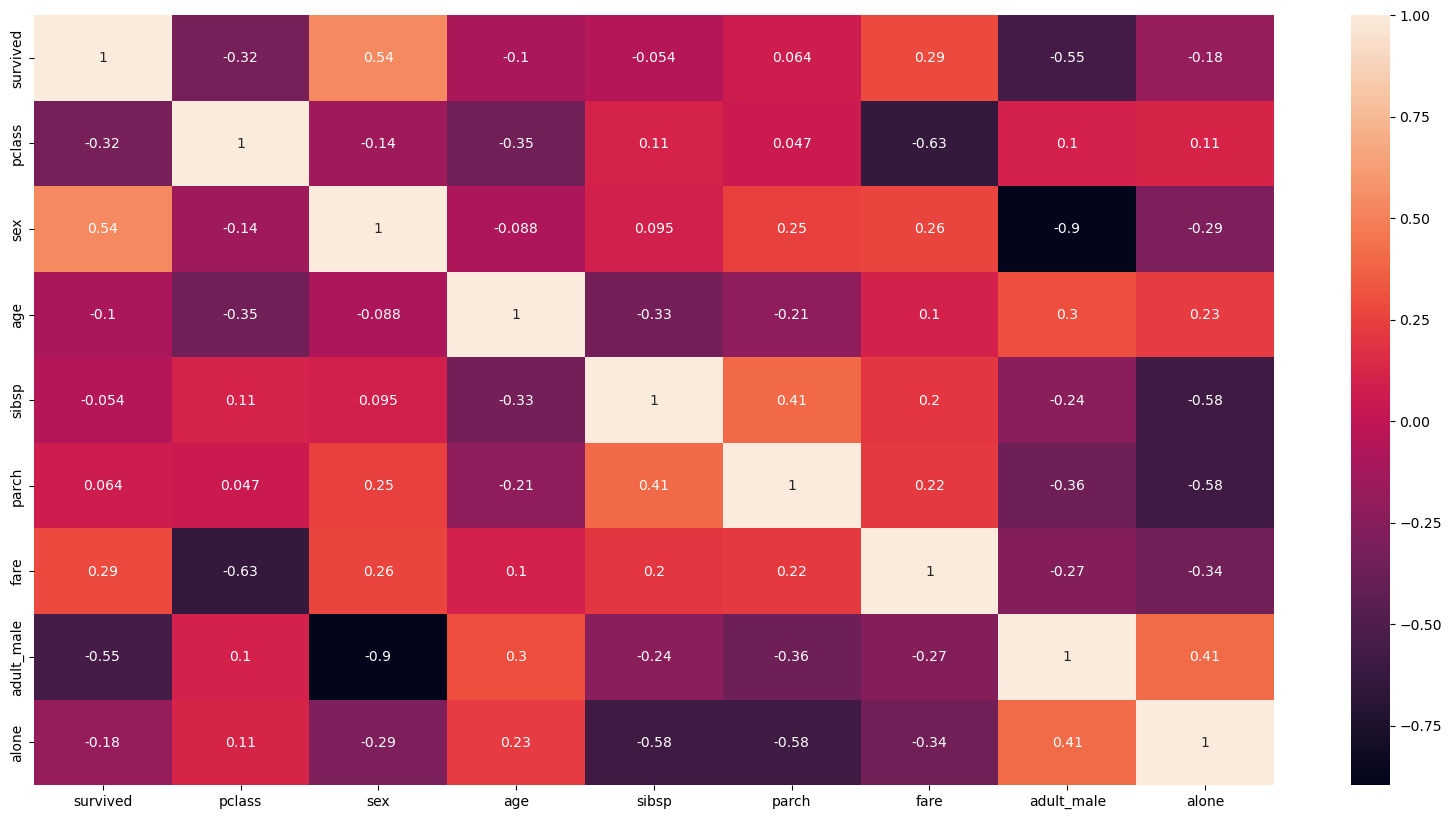

In [104]:
plt.figure(figsize = (20,10))       
sns.heatmap(traindf.corr(),annot = True)
plt.show()

In [ ]:
Independent variables:

In [105]:
independent=traindf.iloc[:,0:8]

In [106]:
independent


,survived,pclass,sex,age,sibsp,parch,fare,embarked
410,0,3,0,NaN,0,0,7.8958,S
638,0,3,1,41.0,0,5,39.6875,S
395,0,3,0,22.0,0,0,7.7958,S
221,0,2,0,27.0,0,0,13.0000,S
800,0,2,0,34.0,0,0,13.0000,S
...,...,...,...,...,...,...,...,...
317,0,2,0,54.0,0,0,14.0000,S
143,0,3,0,19.0,0,0,6.7500,Q
474,0,3,1,22.0,0,0,9.8375,S
318,1,1,1,31.0,0,2,164.8667,S


In [ ]:
Predictive statistics:

In [118]:
traindf['survived'].value_counts()

0    434
1    269
Name: survived, dtype: int64

In [119]:
traindf['survived'].value_counts().to_frame()

,survived
0,434
1,269


In [120]:
traindf['survived'].mean()

0.38264580369843526

In [121]:
traindf.mean()

C:\Users\User\AppData\Local\Temp\ipykernel_16860\2792237151.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  traindf.mean()


survived       0.382646
pclass         2.351351
sex            0.354196
age           29.187833
sibsp          0.530583
parch          0.384068
fare          27.205576
adult_male     0.594595
alone          0.603129
dtype: float64

In [122]:
traindf.median()

C:\Users\User\AppData\Local\Temp\ipykernel_16860\2765254186.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  traindf.median()


survived       0.0000
pclass         3.0000
sex            0.0000
age           28.0000
sibsp          0.0000
parch          0.0000
fare          13.7917
adult_male     1.0000
alone          1.0000
dtype: float64

In [123]:
traindf.mode()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0.0,3.0,0.0,24.0,0.0,0.0,8.05,S,Third,man,True,C,Southampton,no,True
1,NaN,NaN,NaN,30.0,NaN,NaN,13.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
traindf['survived'].skew()

0.4839395764681396

In [125]:
traindf['survived'].kurt()

-1.7708485881177263